<a href="https://colab.research.google.com/github/bnubald/EQ-live/blob/master/Tutorials/6_Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial regression
-----------------------

So you have some data, and you’d like to get a "best-fit” curve through the data. No problem. That’s pretty much what this guide seeks to do. So let’s get started; consider the data set below.

---

*Sample data for regression:*

| X | Y |
| - | :- |
| 0.0 | 6.8053 |
| 0.0714 | -1.5184 |
| 0.1429 | 1.6416 |
| 0.2857 | 6.3543 |
| 0.3571 | 14.3442 |
| 0.4286 | 16.4426 |
| 0.5714 | 18.1953 |
| 0.6429 | 28.9913 |
| 0.7143 | 27.2246 |
| 0.7857 | 40.3759 |
| 0.9286 | 55.3726 |
| 1.0000 | 72.0 |


Our goal is to compute the best fit a polynomial approximation through this data set. We begin by calling two classes from the code. The first class is the Parameter class, that handles all the information regarding the independent variable, or parameter. The second class is the Polyreg class, which actually generates the “best-fit” curve using the information in the parameter. To begin, lets load the data.


In [0]:
#_______________________________________________________________________
# Initial check to see if in Google Colab environment
import sys
IN_COLAB = 'google.colab' in sys.modules

# Install effective-quadratures if in Google Colab environment
# and not already installed
if IN_COLAB and 'equadratures' not in sys.modules:
    !pip install equadratures

In [0]:
from equadratures import Parameter, Basis, Poly, evaluate_model
import numpy as np
import matplotlib.pyplot as plt

dimensions = 1
M = 12
param = Parameter(distribution='Uniform', lower=0, upper=1.0, order=1)
myParameters = [param for i in range(dimensions)] # one-line for loop for parameters
x_train = np.mat([0,0.0714,0.1429,0.2857,0.3571,0.4286,0.5714,0.6429,0.7143,\
                  0.7857,0.9286,1.0000], dtype='float64')
y_train = np.mat([6.8053,-1.5184,1.6416,6.3543,14.3442,16.4426,18.1953,\
                  28.9913,27.2246,40.3759,55.3726,72.0], dtype='float64')
x_train = np.reshape(x_train, (M, 1))
y_train = np.reshape(y_train, (M, 1))

Now we use the univariate basis in the polyreg class.

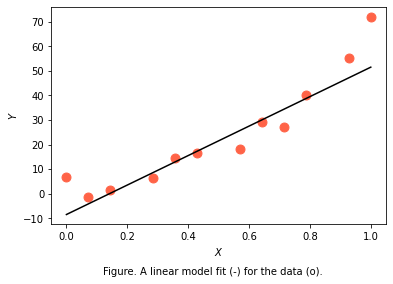

In [3]:
myBasis = Basis('Univariate')
poly = Poly(myParameters, myBasis, method='least-squares',
            sampling_args={'sample-points':x_train,
                           'sample-outputs':y_train} )
poly.set_model()
N = 100
x_test = np.reshape(np.linspace(0, 1, N), (N, 1) )

# Plot the results
fig = plt.figure()
for i in range(0, M):
  plt.scatter(x_train[i,0], y_train[i,0], marker='o', s=80, color='tomato')
plt.plot(x_test, poly.get_polyfit(x_test), 'k-')
plt.xlabel('$X$')
plt.ylabel('$Y$')
caption = 'Figure. A linear model fit (-) for the data (o).'
fig.text(0.5, -0.05, caption, ha='center');

Now, we repeat the same experiment, but increase the order of the polynomial!

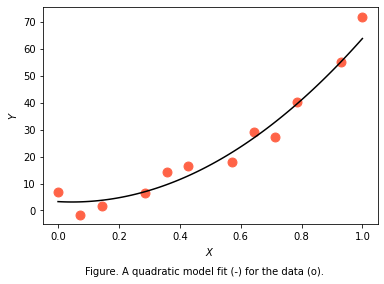

In [4]:
myBasis = Basis('Univariate')
param = Parameter(distribution='Uniform', lower=0, upper=1.0, order=2)
myParameters = [param for i in range(dimensions)] # one-line for loop for parameters
poly = Poly(myParameters, myBasis, method='least-squares',
            sampling_args={'sample-points':x_train,
                           'sample-outputs':y_train} )
poly.set_model()

# Plot the results
fig = plt.figure()
for i in range(0, M):
  plt.scatter(x_train[i,0], y_train[i,0], marker='o', s=80, color='tomato')
plt.plot(x_test, poly.get_polyfit(x_test), 'k-')
plt.xlabel('$X$')
plt.ylabel('$Y$')
caption = 'Figure. A quadratic model fit (-) for the data (o).'
fig.text(0.5, -0.05, caption, ha='center');

The full source code for this tutorial can be found [here](https://github.com/Effective-Quadratures/Effective-Quadratures/blob/master/source/_documentation/codes/tutorial_6.py)